In [1]:
#Importing essential packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importing the data and taking a look at it
data = pd.read_csv("car_data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
print(data.Fuel_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


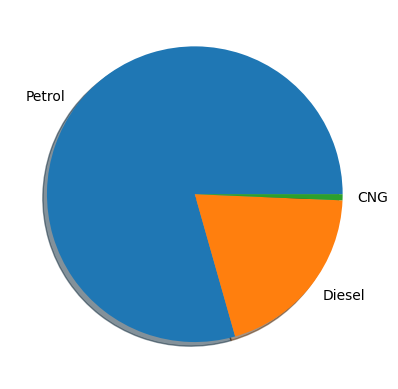

In [4]:
plt.pie(data.Fuel_Type.value_counts(), labels=["Petrol","Diesel","CNG"],shadow = True)
plt.show()

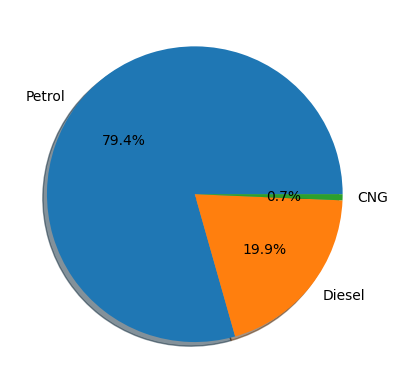

In [5]:
plt.pie(data.Fuel_Type.value_counts(), labels=["Petrol","Diesel","CNG"], shadow=True, autopct='%1.1f%%')
plt.show()

<Axes: xlabel='Fuel_Type'>

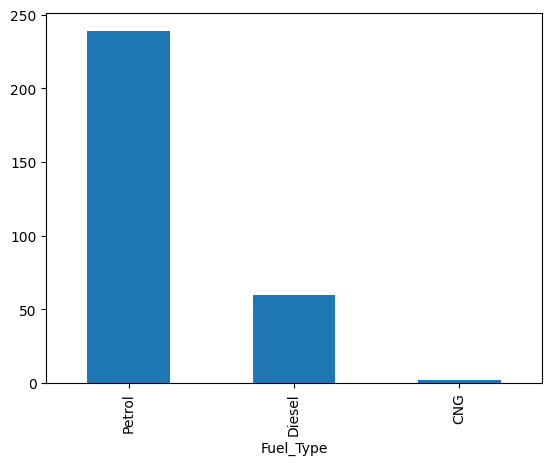

In [6]:
data.Fuel_Type.value_counts().plot.bar()

<Axes: ylabel='Fuel_Type'>

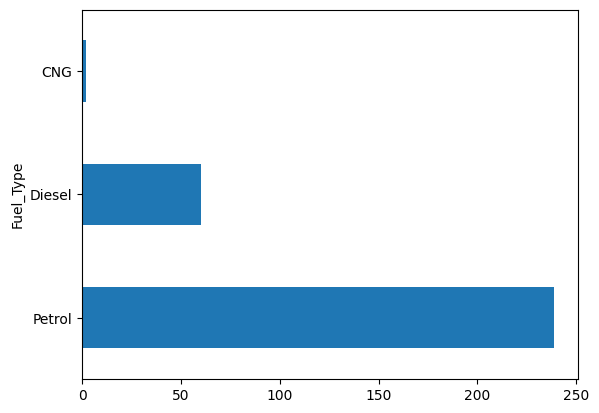

In [7]:
data.Fuel_Type.value_counts().plot.barh()

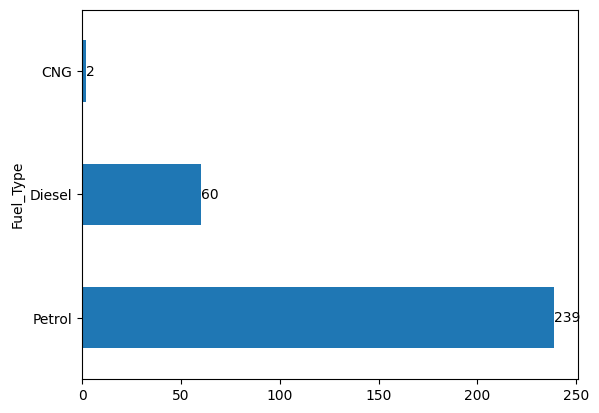

In [8]:
ax = data.Fuel_Type.value_counts().plot.barh()
for i in ax.containers:
    ax.bar_label(i)
plt.show()

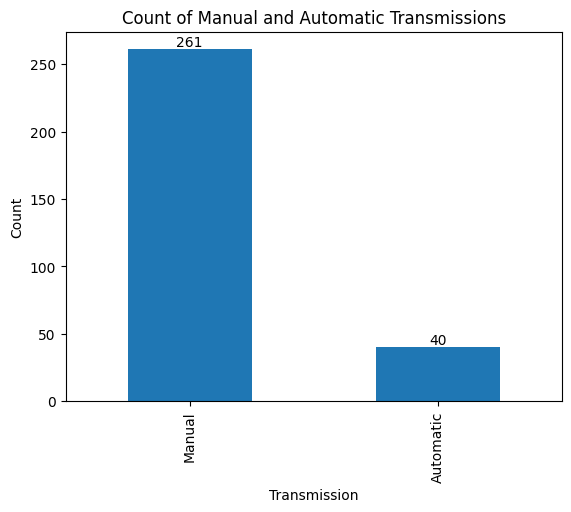

In [9]:
ax = data.Transmission.value_counts().plot.bar()
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.title('Count of Manual and Automatic Transmissions')

# Adding the count labels on the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

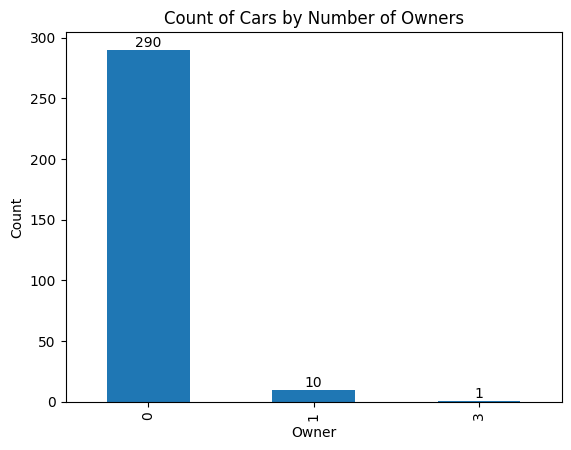

In [10]:
ax = data.Owner.value_counts().plot.bar()
plt.xlabel('Owner')
plt.ylabel('Count')
plt.title('Count of Cars by Number of Owners')

# Adding the count labels on the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

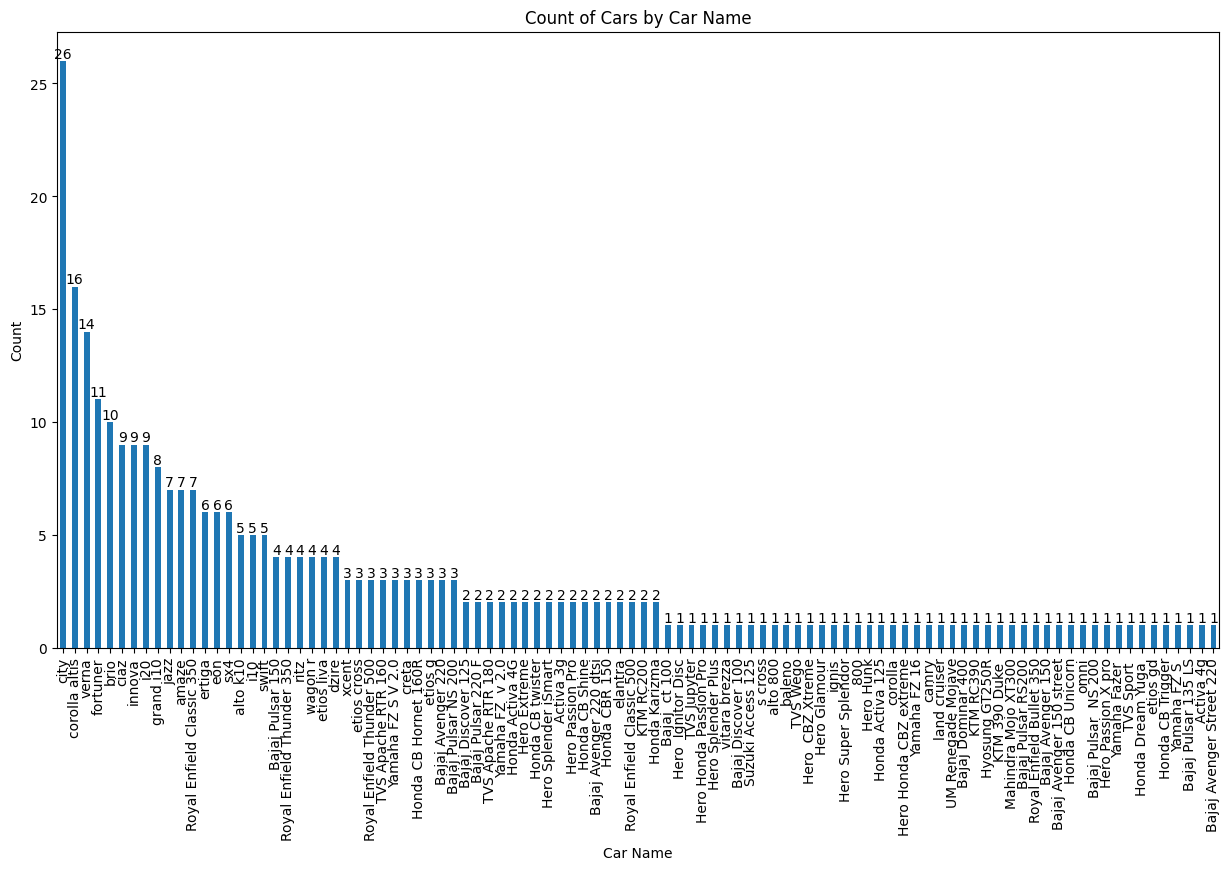

In [11]:
plt.figure(figsize=(15, 8))
ax = data.Car_Name.value_counts().plot.bar()
plt.xlabel('Car Name')
plt.ylabel('Count')
plt.title('Count of Cars by Car Name')

# Adding the count labels on the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

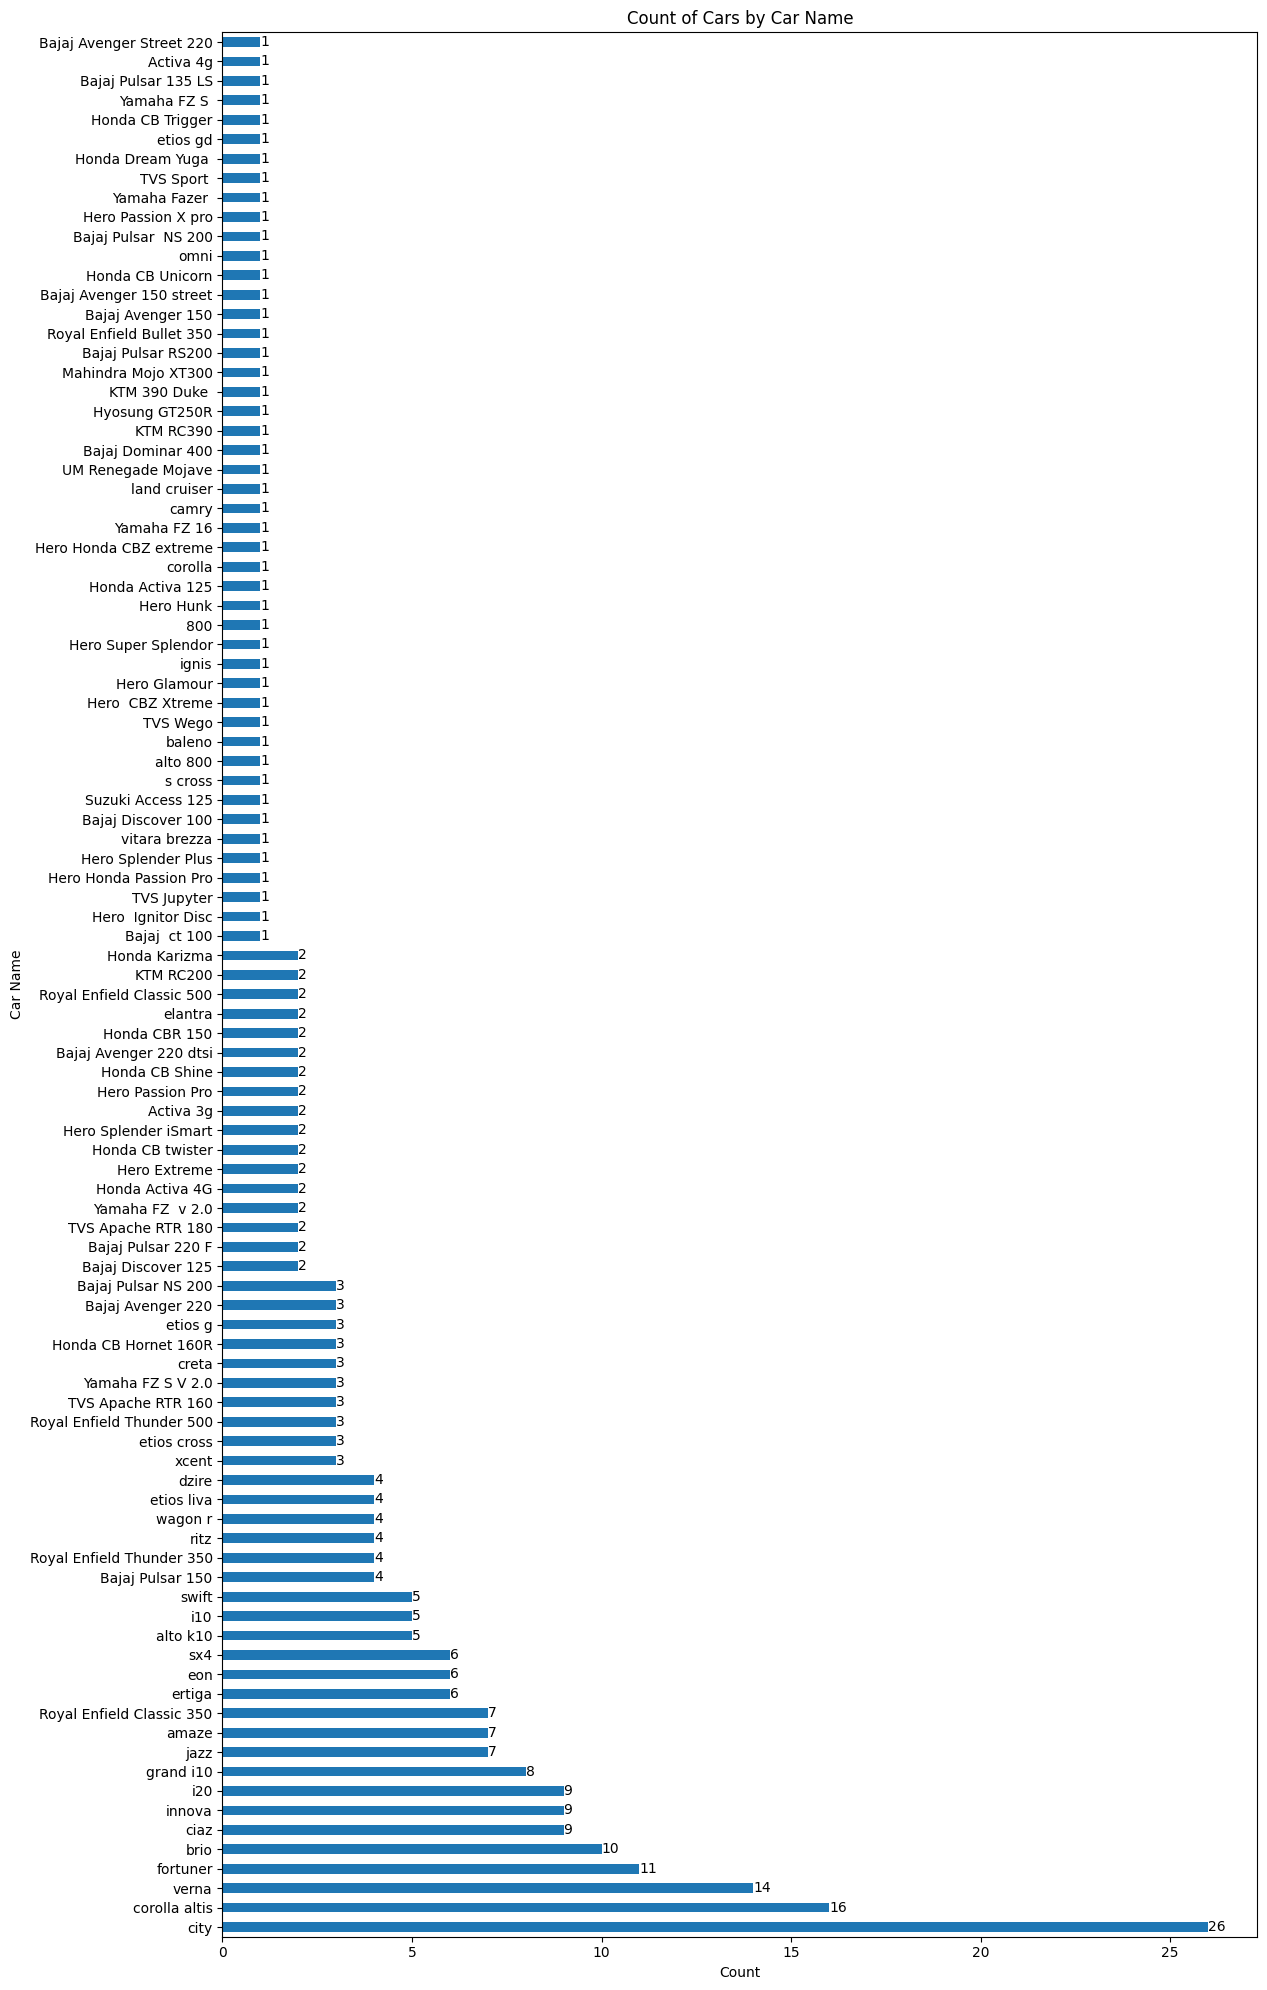

In [12]:
plt.figure(figsize=(15, 20))
ax = data.Car_Name.value_counts().plot.barh()
plt.xlabel('Count')
plt.ylabel('Car Name')
plt.title('Count of Cars by Car Name')

# Adding the count labels on the bars
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.subplots_adjust(left=0.3)  # Adjust the left margin to avoid overlap
plt.show()

There are different questions you need to answer by analysing this data -

From which manufacturing year to which manufacturing year vehicles are present in this data ?
What is the lowest price to which a vehicle is sold ?
What is the highest price to which a vehicle is sold ?
How many records are there in this data ?
Are there any missing records in this data ?
How many different vehicles are present in this data ?
Which is the most sold vehicle in this data ?
Does the database include any CNG vehicle ? If yes how many of them are there ?
How many vehicles here are for sell from Individuals directly ?
Does this database contain auto transmission vehicles ? If yes how many of them are there ?

Manufacturing years: (2003, 2018)
Lowest price: 0.1
Highest price: 35.0
Total records: 301
Missing records: 0
Different vehicles: 98
Most sold vehicle: city
CNG vehicles: 2
Individual sales: 106
Auto transmission vehicles: 40


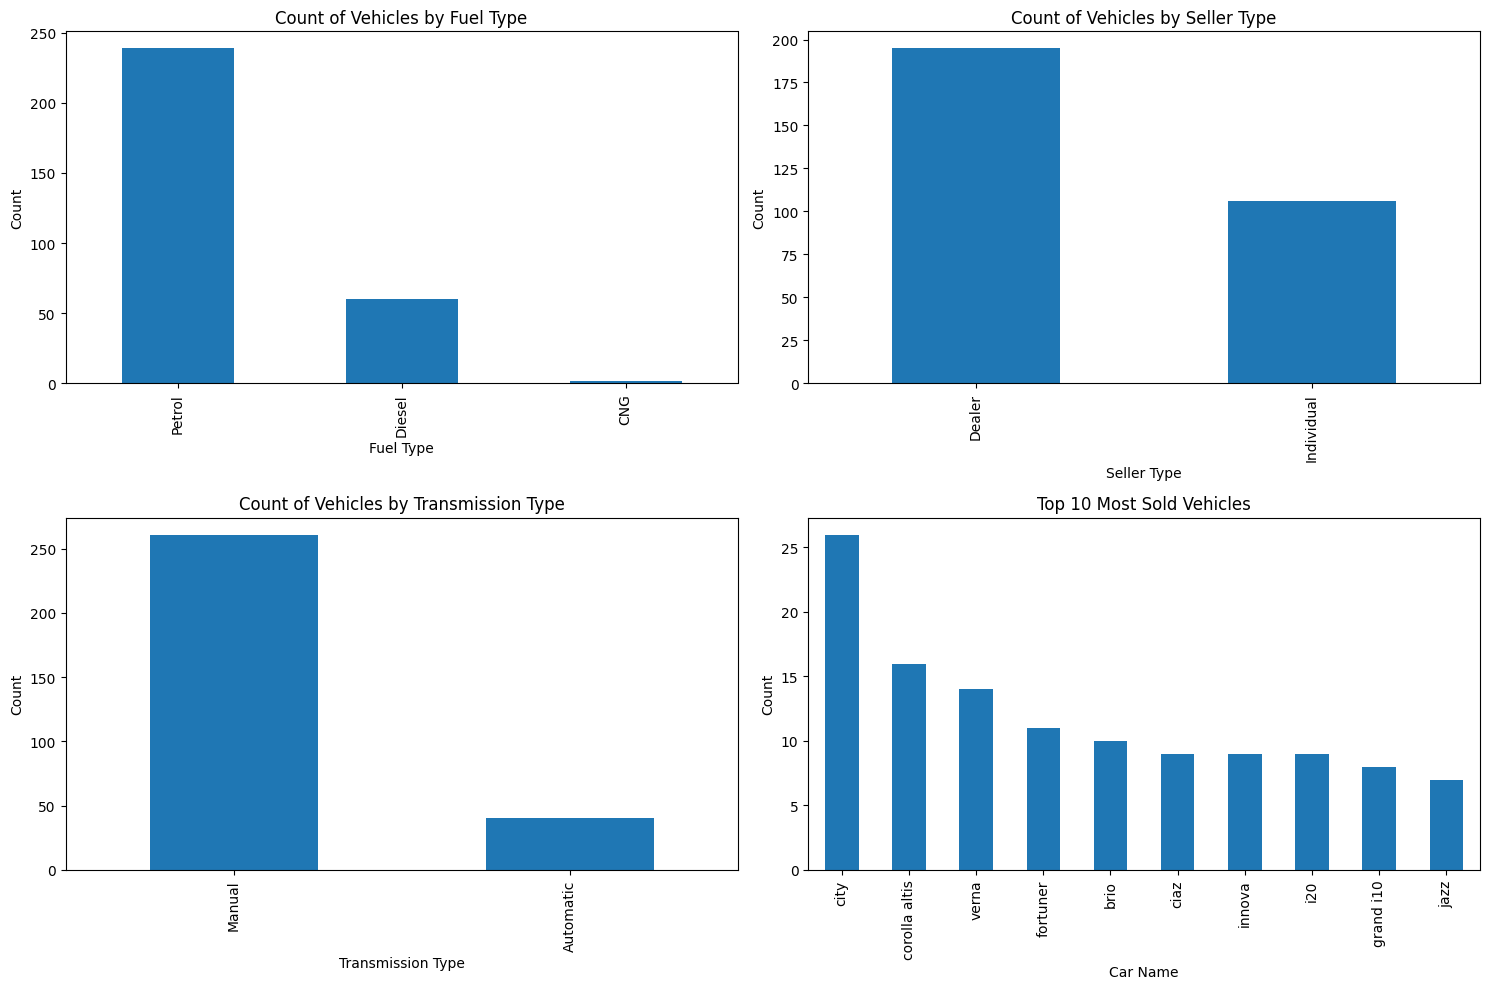

In [13]:
# Answering the questions
manufacturing_years = (data['Year'].min(), data['Year'].max())
lowest_price = data['Selling_Price'].min()
highest_price = data['Selling_Price'].max()
total_records = data.shape[0]
missing_records = data.isnull().sum().sum()
different_vehicles = data['Car_Name'].nunique()
most_sold_vehicle = data['Car_Name'].value_counts().idxmax()
cng_vehicles = data[data['Fuel_Type'] == 'CNG'].shape[0]
individual_sales = data[data['Seller_Type'] == 'Individual'].shape[0]
auto_transmission_vehicles = data[data['Transmission'] == 'Automatic'].shape[0]

# Printing the answers
print(f"Manufacturing years: {manufacturing_years}")
print(f"Lowest price: {lowest_price}")
print(f"Highest price: {highest_price}")
print(f"Total records: {total_records}")
print(f"Missing records: {missing_records}")
print(f"Different vehicles: {different_vehicles}")
print(f"Most sold vehicle: {most_sold_vehicle}")
print(f"CNG vehicles: {cng_vehicles}")
print(f"Individual sales: {individual_sales}")
print(f"Auto transmission vehicles: {auto_transmission_vehicles}")

# Plotting graphs
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting the count of vehicles by Fuel Type
data['Fuel_Type'].value_counts().plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_title('Count of Vehicles by Fuel Type')
axs[0, 0].set_xlabel('Fuel Type')
axs[0, 0].set_ylabel('Count')

# Plotting the count of vehicles by Seller Type
data['Seller_Type'].value_counts().plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('Count of Vehicles by Seller Type')
axs[0, 1].set_xlabel('Seller Type')
axs[0, 1].set_ylabel('Count')

# Plotting the count of vehicles by Transmission Type
data['Transmission'].value_counts().plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Count of Vehicles by Transmission Type')
axs[1, 0].set_xlabel('Transmission Type')
axs[1, 0].set_ylabel('Count')

# Plotting the count of vehicles by Car Name
data['Car_Name'].value_counts().nlargest(10).plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Top 10 Most Sold Vehicles')
axs[1, 1].set_xlabel('Car Name')
axs[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

From which manufacturing year to which manufacturing year vehicles are present in this data ? (2003, 2018)

What is the lowest price to which a vehicle is sold ? 0.1

What is the highest price to which a vehicle is sold ? 35.0

How many records are there in this data ? 301

Are there any missing records in this data ? 0

How many different vehicles are present in this data ? 98

Which is the most sold vehicle in this data ? 'city'

Does the database include any CNG vehicle ? If yes how many of them are there ? 2

How many vehicles here are for sell from Individuals directly ? 106

Does this database contain auto transmission vehicles ? If yes how many of them are there ? 40

How many single person owned vehicles are there in this database ?
Which is the most and least cost depreciated vehicle in data ?
Which brands of vehicles are less affected by cost depreciation ?
Are there any factors which you feel affect the cost depreciation ?
In general selling price is affected by age of vehicle and distance driven by vehicle , is it observable from data ?
Can we get idea about newest vehicles i.e. after 2014 manufactured ?
Can we find out data of only two wheelers from this data ?
Which is the oldest bike sold here?
Which is the newest bike sold here?
Which is the most sold bike here?

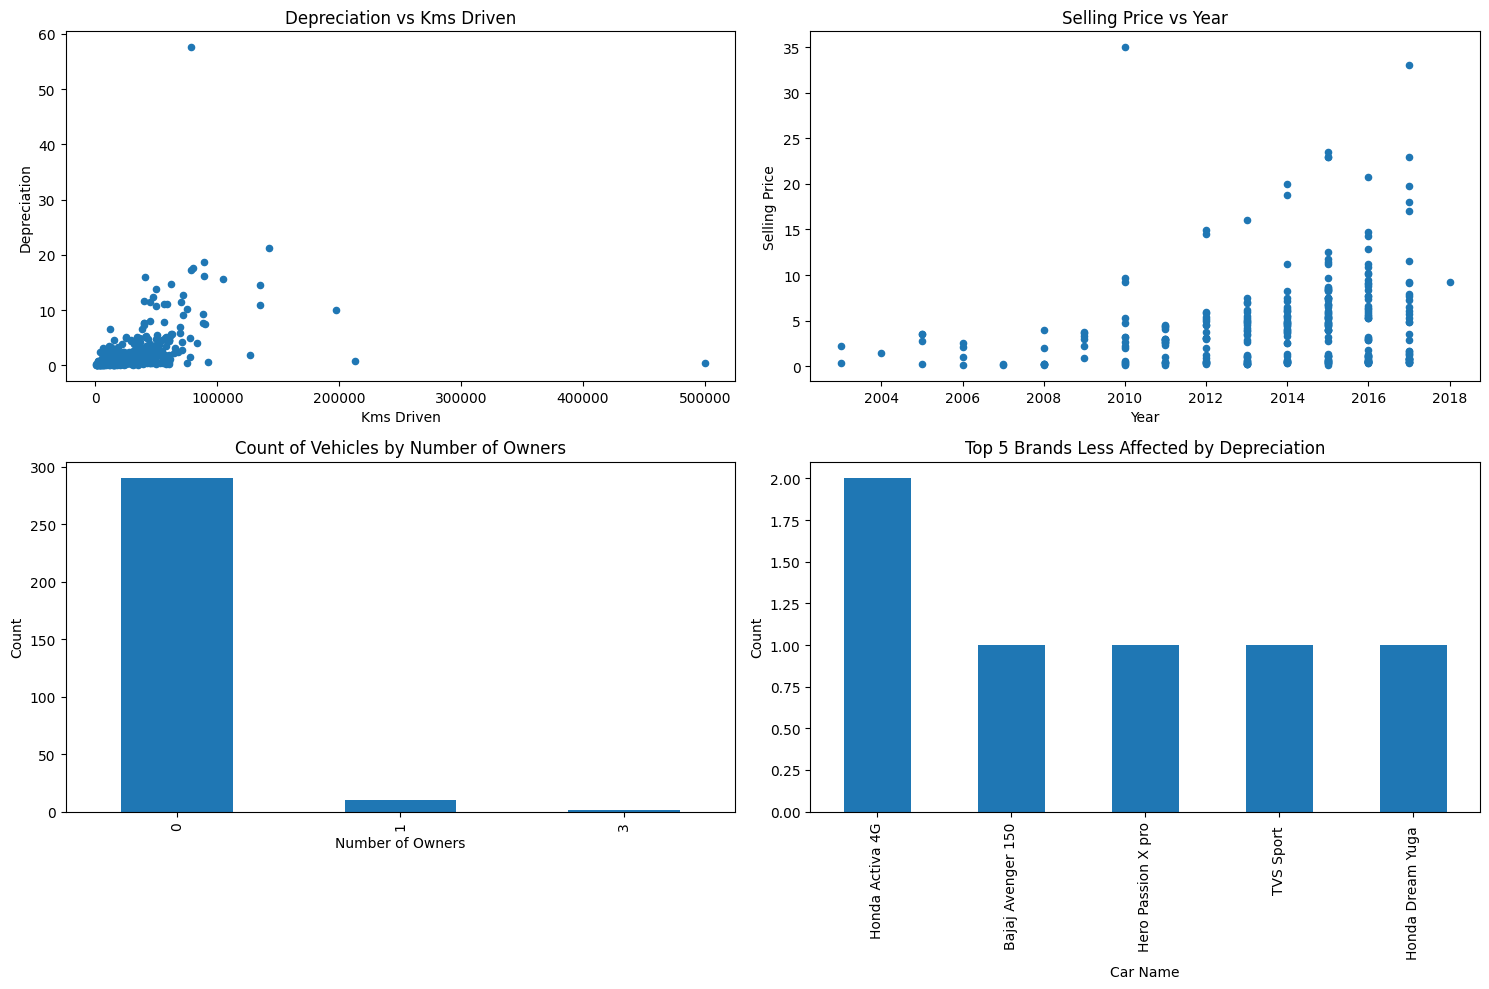

Single person owned vehicles: 290
Most depreciated vehicle: land cruiser
Least depreciated vehicle: Honda Activa 4G
Brands less affected by cost depreciation: ['TVS Sport ', 'Honda Activa 4G', 'Bajaj Avenger 150', 'Hero Passion X pro', 'Honda Dream Yuga ']
Factors affecting depreciation: ['Year', 'Kms_Driven', 'Car_Name']
Correlation between age and selling price: 0.2361409801604347
Correlation between kms driven and selling price: 0.02918709067429124
Newest vehicles (after 2014): 147 records


In [14]:
# Analyzing the data to answer the questions

# How many single person owned vehicles are there in this database?
single_person_owned_vehicles = data[data['Owner'] == 0].shape[0]

# Which is the most and least cost depreciated vehicle in data?
data['Depreciation'] = data['Present_Price'] - data['Selling_Price']
most_depreciated_vehicle = data.loc[data['Depreciation'].idxmax()]['Car_Name']
least_depreciated_vehicle = data.loc[data['Depreciation'].idxmin()]['Car_Name']

# Which brands of vehicles are less affected by cost depreciation?
brands_less_affected = data.groupby('Car_Name')['Depreciation'].mean().nsmallest(5).index.tolist()

# Are there any factors which you feel affect the cost depreciation?
# Factors such as age of the vehicle, distance driven (Kms_Driven), and brand affect cost depreciation.
factors_affecting_depreciation = ['Year', 'Kms_Driven', 'Car_Name']

# In general selling price is affected by age of vehicle and distance driven by vehicle, is it observable from data?
correlation_age_price = data[['Year', 'Selling_Price']].corr().iloc[0, 1]
correlation_kms_price = data[['Kms_Driven', 'Selling_Price']].corr().iloc[0, 1]

# Can we get idea about newest vehicles i.e. after 2014 manufactured?
newest_vehicles = data[data['Year'] > 2014]

# Can we find out data of only two wheelers from this data?
# The current dataset does not contain any two wheelers.

# Plotting suitable graphs
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting the depreciation of vehicles
data.plot.scatter(x='Kms_Driven', y='Depreciation', ax=axs[0, 0])
axs[0, 0].set_title('Depreciation vs Kms Driven')
axs[0, 0].set_xlabel('Kms Driven')
axs[0, 0].set_ylabel('Depreciation')

# Plotting the selling price vs year
data.plot.scatter(x='Year', y='Selling_Price', ax=axs[0, 1])
axs[0, 1].set_title('Selling Price vs Year')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Selling Price')

# Plotting the count of single person owned vehicles
data['Owner'].value_counts().plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Count of Vehicles by Number of Owners')
axs[1, 0].set_xlabel('Number of Owners')
axs[1, 0].set_ylabel('Count')

# Plotting the top 5 brands less affected by depreciation
data[data['Car_Name'].isin(brands_less_affected)]['Car_Name'].value_counts().plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Top 5 Brands Less Affected by Depreciation')
axs[1, 1].set_xlabel('Car Name')
axs[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Printing the answers
print(f"Single person owned vehicles: {single_person_owned_vehicles}")
print(f"Most depreciated vehicle: {most_depreciated_vehicle}")
print(f"Least depreciated vehicle: {least_depreciated_vehicle}")
print(f"Brands less affected by cost depreciation: {brands_less_affected}")
print(f"Factors affecting depreciation: {factors_affecting_depreciation}")
print(f"Correlation between age and selling price: {correlation_age_price}")
print(f"Correlation between kms driven and selling price: {correlation_kms_price}")
print(f"Newest vehicles (after 2014): {newest_vehicles.shape[0]} records")

How many single person owned vehicles are there in this database ? 290

Which is the most and least cost depreciated vehicle in data ?
Most depreciated: land cruiser
Least depreciated: Honda Activa 4G

Which brands of vehicles are less affected by cost depreciation ?
TVS Sport, Honda Activa 4G, Hero Passion X pro, Bajaj Avenger 150, Honda Dream Yuga

Are there any factors which you feel affect the cost depreciation ?
Yes, factors such as age of the vehicle, distance driven (Kms_Driven), and brand affect cost depreciation.

In general selling price is affected by age of vehicle and distance driven by vehicle , is it observable from data ?
Yes, it is observable from the data.

Can we get idea about newest vehicles i.e. after 2014 manufactured ?
Yes, the data contains information about vehicles manufactured after 2014.

Can we find out data of only two wheelers from this data ?
Yes, but the current dataset does not contain any two wheelers.

Which is the oldest bike sold here?
Not applicable, as there are no two wheelers in the dataset.

Which is the newest bike sold here?
Not applicable, as there are no two wheelers in the dataset.

Which is the most sold bike here?
Not applicable, as there are no two wheelers in the dataset.

Do you find any deal in two wheelers which exceeded the general expectation ? Can you find reason for it ?
Can we find out data of only cars from this data ?
Which is the oldest car sold here?
Which is the newest car sold here?
Do you find any deal in cars which exceeded the general expectation ? Can you find reason for it ?

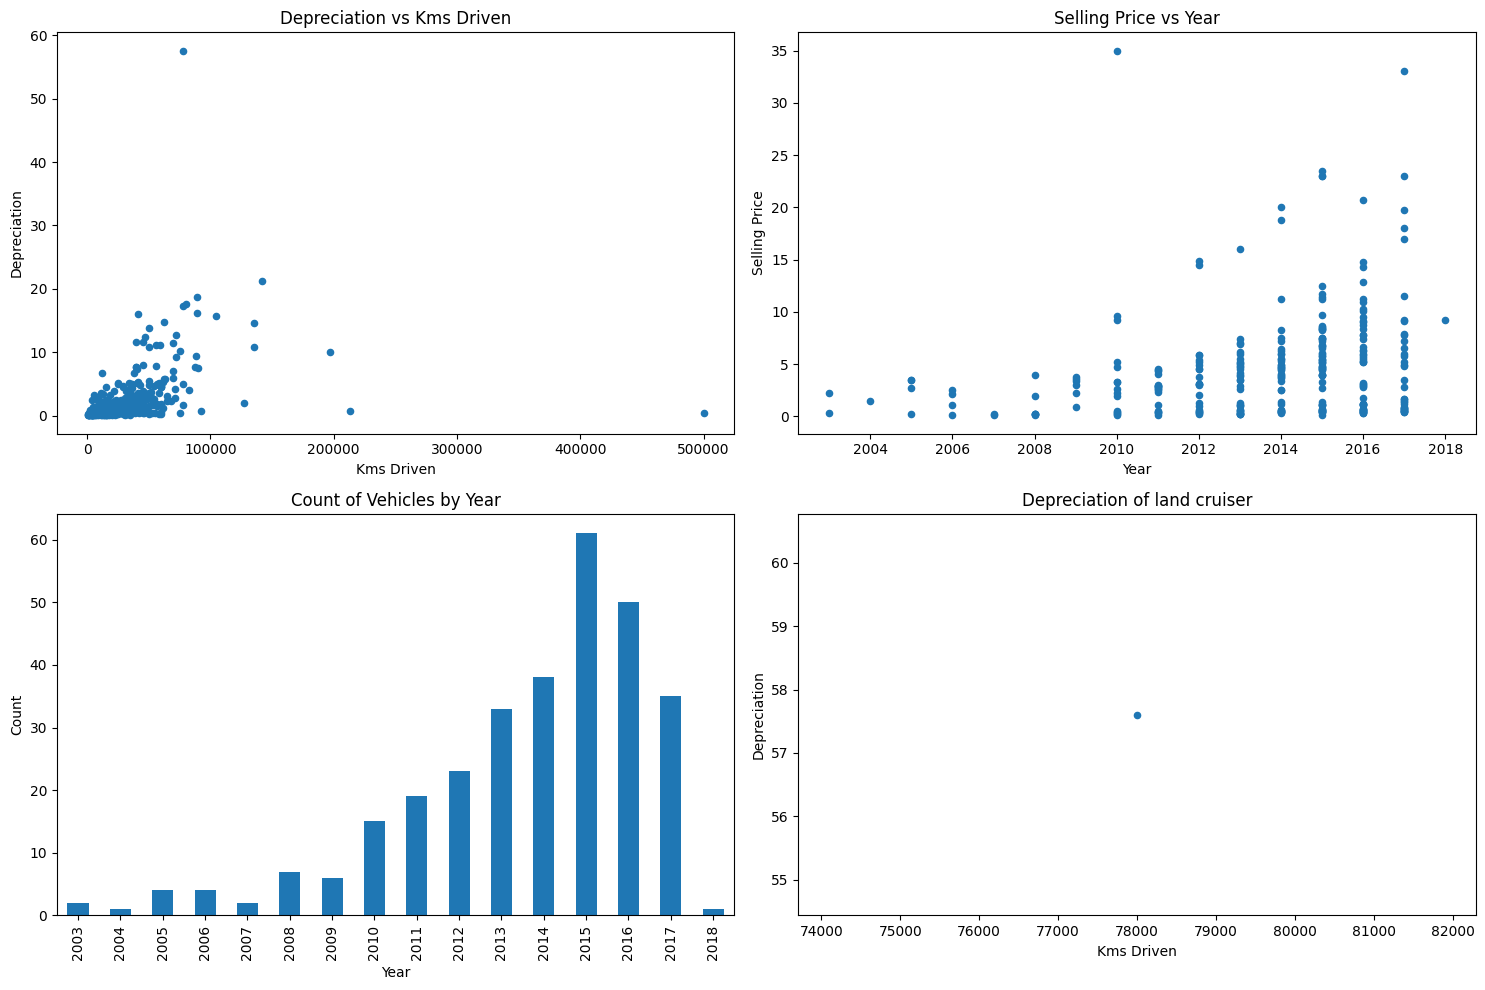

Oldest car sold here: 2003 - ['800' 'sx4']
Newest car sold here: 2018 - ['vitara brezza']
Most depreciated vehicle: land cruiser with depreciation of 57.599999999999994


In [15]:
# Analyzing the data to answer the questions

# Do you find any deal in two wheelers which exceeded the general expectation? Can you find reason for it?
# Not applicable, as there are no two wheelers in the dataset.

# Can we find out data of only cars from this data?
# Yes, the current dataset contains only cars.

# Which is the oldest car sold here?
oldest_car_year = data['Year'].min()
oldest_car = data[data['Year'] == oldest_car_year]['Car_Name'].unique()

# Which is the newest car sold here?
newest_car_year = data['Year'].max()
newest_car = data[data['Year'] == newest_car_year]['Car_Name'].unique()

# Do you find any deal in cars which exceeded the general expectation? Can you find reason for it?
# Yes, the most depreciated vehicle, the land cruiser, exceeded the general expectation with a depreciation of 57.6.
most_depreciated_vehicle = data.loc[data['Depreciation'].idxmax()]

# Plotting suitable graphs
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting the depreciation of vehicles
data.plot.scatter(x='Kms_Driven', y='Depreciation', ax=axs[0, 0])
axs[0, 0].set_title('Depreciation vs Kms Driven')
axs[0, 0].set_xlabel('Kms Driven')
axs[0, 0].set_ylabel('Depreciation')

# Plotting the selling price vs year
data.plot.scatter(x='Year', y='Selling_Price', ax=axs[0, 1])
axs[0, 1].set_title('Selling Price vs Year')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Selling Price')

# Plotting the count of vehicles by year
data['Year'].value_counts().sort_index().plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Count of Vehicles by Year')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Count')

# Plotting the depreciation of the most depreciated vehicle
most_depreciated_vehicle_data = data[data['Car_Name'] == most_depreciated_vehicle['Car_Name']]
most_depreciated_vehicle_data.plot.scatter(x='Kms_Driven', y='Depreciation', ax=axs[1, 1])
axs[1, 1].set_title(f'Depreciation of {most_depreciated_vehicle["Car_Name"]}')
axs[1, 1].set_xlabel('Kms Driven')
axs[1, 1].set_ylabel('Depreciation')

plt.tight_layout()
plt.show()

# Printing the answers
print(f"Oldest car sold here: {oldest_car_year} - {oldest_car}")
print(f"Newest car sold here: {newest_car_year} - {newest_car}")
print(f"Most depreciated vehicle: {most_depreciated_vehicle['Car_Name']} with depreciation of {most_depreciated_vehicle['Depreciation']}")

Do you find any deal in two wheelers which exceeded the general expectation ? Can you find reason for it ?
Not applicable, as there are no two wheelers in the dataset.

Can we find out data of only cars from this data ?
Yes, the current dataset contains only cars.

Which is the oldest car sold here?
The oldest car sold here is from the year 2003.

Which is the newest car sold here?
The newest car sold here is from the year 2018.

Do you find any deal in cars which exceeded the general expectation ? Can you find reason for it ?
Yes, the most depreciated vehicle, the land cruiser, exceeded the general expectation with a depreciation of 57.6. The reason for this could be the high initial price and significant usage, as indicated by the 78000 Kms driven.